## NAME: Souri Rishik Volety
## Reg No: 230968004

In [2]:
import os
import tensorflow as tf

2025-08-24 19:30:34.915102: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-24 19:30:34.915295: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-24 19:30:34.917576: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-24 19:30:34.947033: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-24 19:30:35.444116: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [3]:
BATCH_SIZE = 32
IMG_SIZE = 224
EPOCHS = 10 # the models are reaching convergance before 10 epochs
SEED = 123

In [4]:
catsdogs_train = os.path.join('data', 'cats_and_dogs_filtered', 'train')
catsdogs_val   = os.path.join('data', 'cats_and_dogs_filtered', 'validation')
horsezebra_train = os.path.join('horse_2_zebra', 'train')
horsezebra_val   = os.path.join('horse_2_zebra', 'validation')

In [5]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    catsdogs_train, image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE,
    label_mode='int', shuffle=True, seed=SEED,
)
val_set = tf.keras.preprocessing.image_dataset_from_directory(
    catsdogs_val, image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE,
    label_mode='int', shuffle=False,
)
class_names = train_set.class_names

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


2025-08-24 19:30:37.227758: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-24 19:30:37.228377: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import VGG16, InceptionV3, ResNet50, EfficientNetB0, MobileNetV2
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_pp
from tensorflow.keras.applications.inception_v3 import preprocess_input as incv3_pp # googlnet
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_pp
from tensorflow.keras.applications.efficientnet import preprocess_input as effb0_pp
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenetv2_pp

In [7]:
AUG_LAYER = tf.keras.Sequential([     # a layer to augment the images with flip, rotation and zoom
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1),
], name="aug")

In [33]:
base_ctor, preprocess = VGG16, vgg16_pp
inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = AUG_LAYER(inputs)
x = layers.Lambda(preprocess, name="preprocess")(x) # need preprocessing because the model was trained on preprocessed imagenet instead of raw pixels
base = base_ctor(include_top=False, weights="imagenet", input_tensor=x)
base.trainable = False
x = layers.GlobalAveragePooling2D()(base.output)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"vgg16")

In [34]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [35]:
history = model.fit(train_set, epochs=EPOCHS, validation_data=val_set)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - accuracy: 0.8270 - loss: 0.7946 - val_accuracy: 0.9540 - val_loss: 0.1522
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.9270 - loss: 0.2820 - val_accuracy: 0.9670 - val_loss: 0.1045
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.9520 - loss: 0.1732 - val_accuracy: 0.9750 - val_loss: 0.0801
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.9575 - loss: 0.1716 - val_accuracy: 0.9810 - val_loss: 0.0747
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 0.9645 - loss: 0.1339 - val_accuracy: 0.9810 - val_loss: 0.0664
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.9675 - loss: 0.1035 - val_accuracy: 0.9790 - val_loss: 0.0710
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.9680 - loss: 0.1117 - val_accuracy: 0.9810 - val_loss: 0.0774
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.9700 - loss: 0.1109 - val_accu

In [15]:
import matplotlib.pyplot as plt

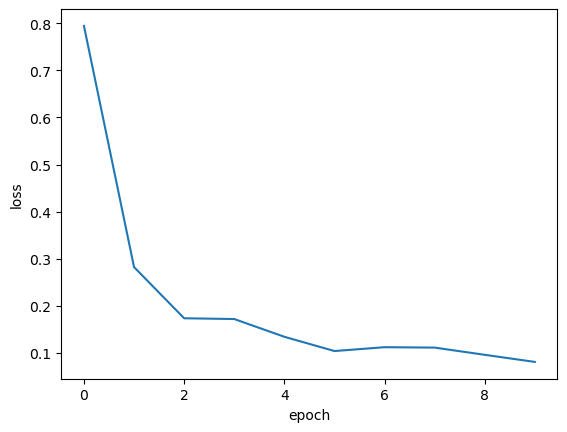

In [37]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

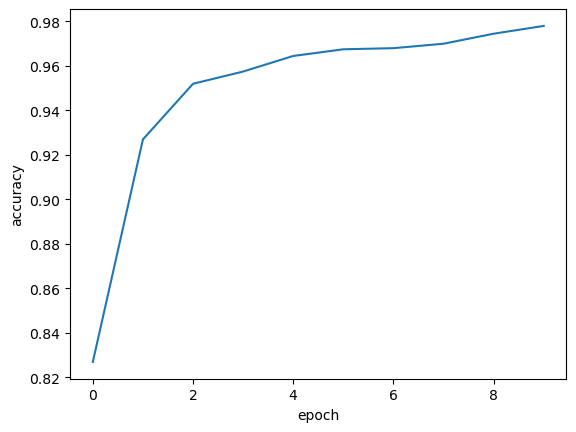

In [38]:
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

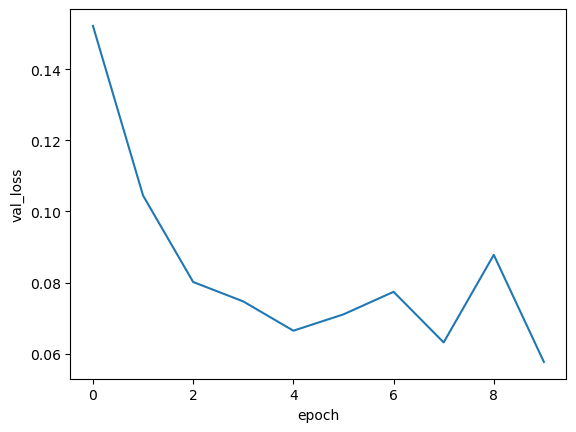

In [39]:
plt.plot(history.history['val_loss'])
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.show()

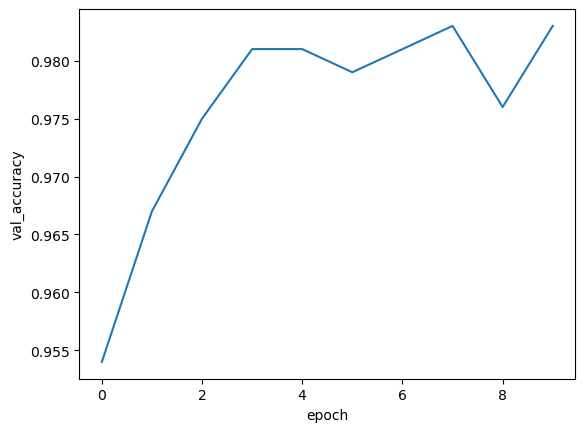

In [40]:
plt.plot(history.history['val_accuracy'])
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.show()

In [41]:
base_ctor, preprocess = InceptionV3, incv3_pp # googlenet is renamed to inception in keras
inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = AUG_LAYER(inputs)
x = layers.Lambda(preprocess, name="preprocess")(x)
base = base_ctor(include_top=False, weights="imagenet", input_tensor=x)
base.trainable = False
x = layers.GlobalAveragePooling2D()(base.output)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"vgg16")

In [42]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [43]:
history = model.fit(train_set, epochs=EPOCHS, validation_data=val_set)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 159ms/step - accuracy: 0.8830 - loss: 0.2755 - val_accuracy: 0.9810 - val_loss: 0.0664
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9740 - loss: 0.0730 - val_accuracy: 0.9870 - val_loss: 0.0376
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9805 - loss: 0.0612 - val_accuracy: 0.9860 - val_loss: 0.0452
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9840 - loss: 0.0505 - val_accuracy: 0.9880 - val_loss: 0.0347
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9865 - loss: 0.0477 - val_accuracy: 0.9880 - val_loss: 0.0421
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.9865 - loss: 0.0349 - val_accuracy: 0.9840 - val_loss: 0.0523
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.9810 - loss: 0.0500 - val_accuracy: 0.9880 - val_loss: 0.0403
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.9935 - loss: 0.0227 - val_accuracy: 0.9880 -

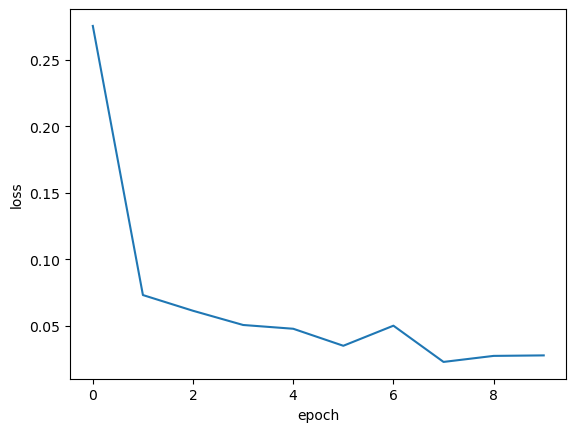

In [44]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

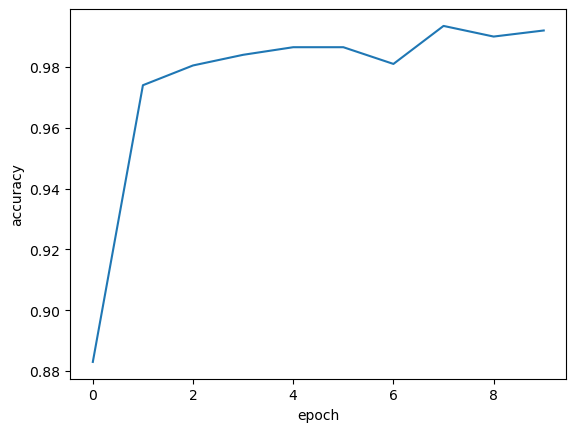

In [45]:
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

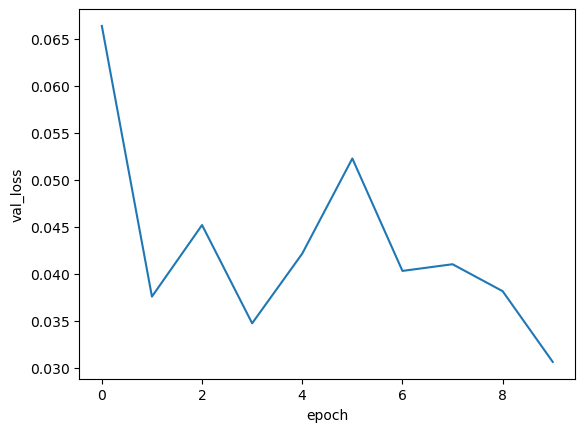

In [46]:
plt.plot(history.history['val_loss'])
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.show()

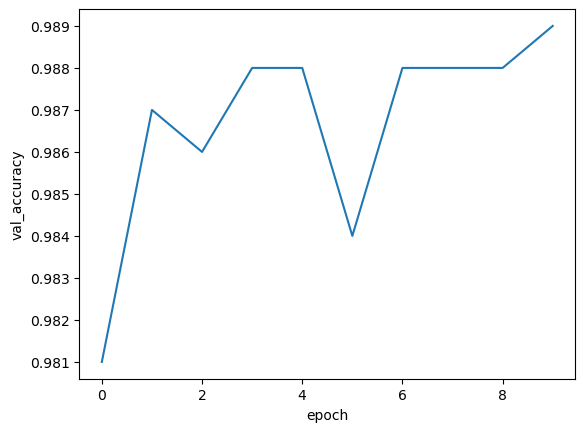

In [47]:
plt.plot(history.history['val_accuracy'])
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.show()

In [48]:
base_ctor, preprocess = ResNet50, resnet50_pp
inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = AUG_LAYER(inputs)
x = layers.Lambda(preprocess, name="preprocess")(x)
base = base_ctor(include_top=False, weights="imagenet", input_tensor=x)
base.trainable = False
x = layers.GlobalAveragePooling2D()(base.output)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"vgg16")

In [49]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [50]:
history = model.fit(train_set, epochs=EPOCHS, validation_data=val_set)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 179ms/step - accuracy: 0.9315 - loss: 0.1680 - val_accuracy: 0.9880 - val_loss: 0.0387
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - accuracy: 0.9845 - loss: 0.0544 - val_accuracy: 0.9890 - val_loss: 0.0333
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.9855 - loss: 0.0396 - val_accuracy: 0.9900 - val_loss: 0.0323
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.9850 - loss: 0.0380 - val_accuracy: 0.9880 - val_loss: 0.0269
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.9840 - loss: 0.0351 - val_accuracy: 0.9860 - val_loss: 0.0265
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - accuracy: 0.9895 - loss: 0.0255 - val_accuracy: 0.9860 - val_loss: 0.0271
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - accuracy: 0.9920 - loss: 0.0222 - val_accuracy: 0.9820 - val_loss: 0.0332
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - accuracy: 0.9875 - loss: 0.0283 - val_accuracy: 0

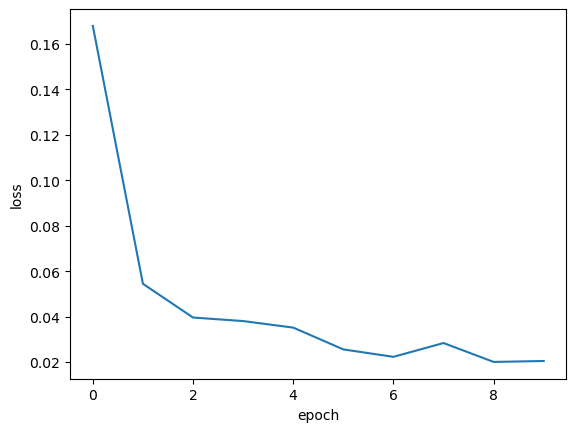

In [51]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

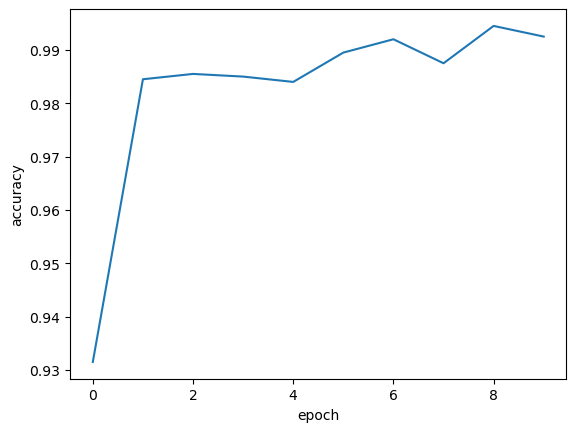

In [52]:
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

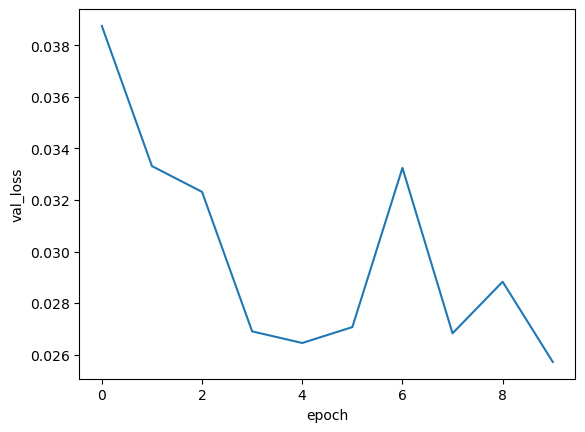

In [53]:
plt.plot(history.history['val_loss'])
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.show()

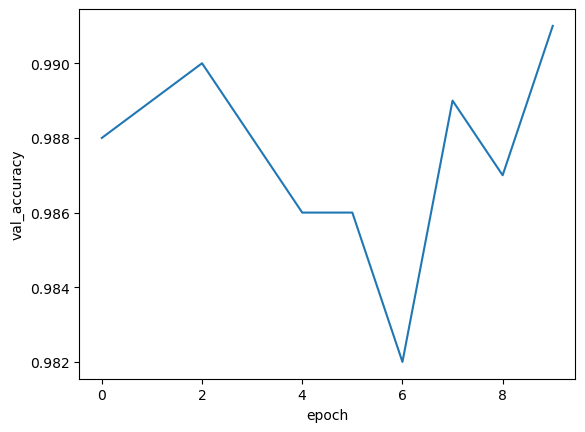

In [54]:
plt.plot(history.history['val_accuracy'])
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.show()

In [11]:
base_ctor, preprocess = EfficientNetB0, effb0_pp
inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = AUG_LAYER(inputs)
x = layers.Lambda(preprocess, name="preprocess")(x)
base = base_ctor(include_top=False, weights=None, input_tensor=x) #efficientnet not working with imagenet weights
base.trainable = False
x = layers.GlobalAveragePooling2D()(base.output)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"efficientnetb0")

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [13]:
history = model.fit(train_set, epochs=EPOCHS, validation_data=val_set)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 56s 814ms/step - accuracy: 0.4865 - loss: 0.6932 - val_accuracy: 0.5020 - val_loss: 0.6931
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 792ms/step - accuracy: 0.4985 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 758ms/step - accuracy: 0.4920 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 46s 736ms/step - accuracy: 0.4820 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 46s 737ms/step - accuracy: 0.4830 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 46s 734ms/step - accuracy: 0.4935 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 46s 735ms/step - accuracy: 0.4750 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 46s 734ms/step - accuracy: 0.4780 - loss: 0.6932 - val_accu

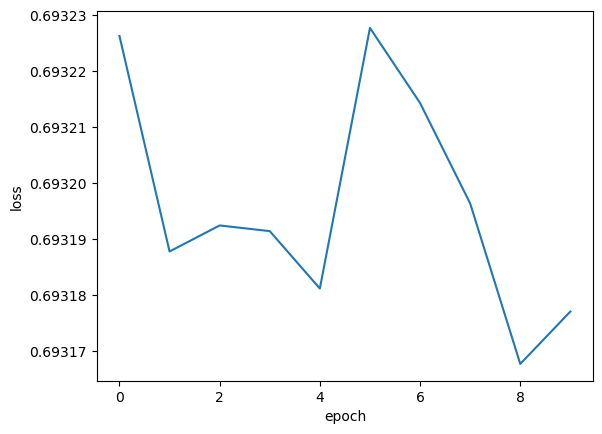

In [16]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

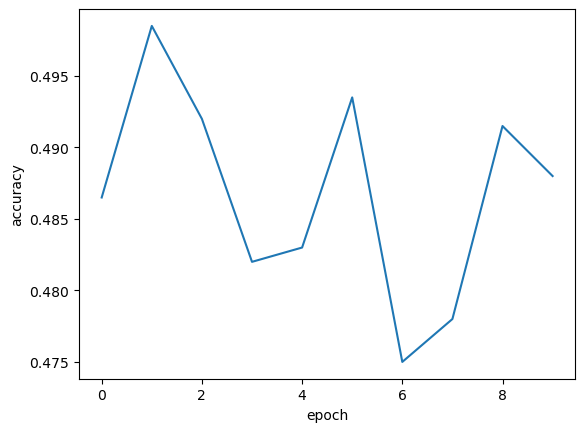

In [17]:
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

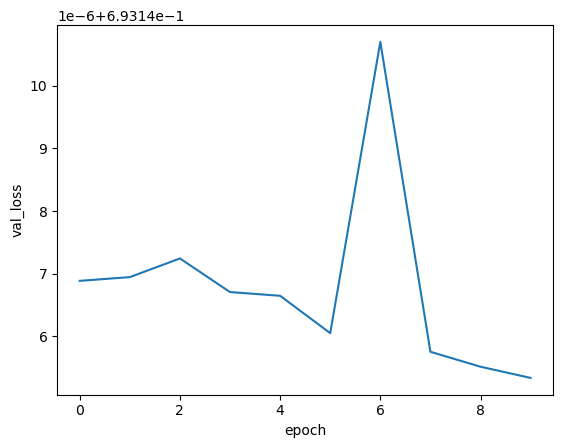

In [18]:
plt.plot(history.history['val_loss'])
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.show()

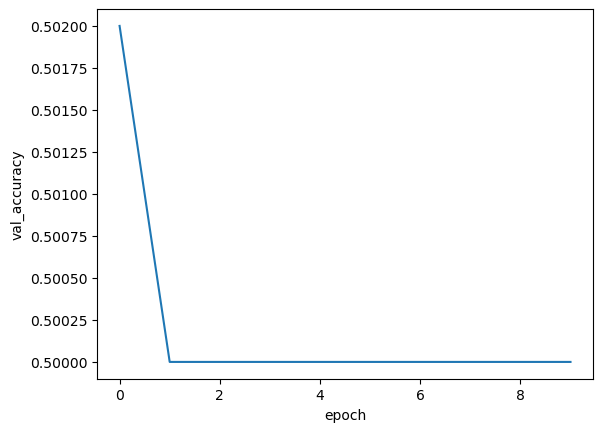

In [19]:
plt.plot(history.history['val_accuracy'])
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.show()

In [20]:
base_ctor, preprocess = MobileNetV2, mobilenetv2_pp
inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = AUG_LAYER(inputs)
x = layers.Lambda(preprocess, name="preprocess")(x)
base = base_ctor(include_top=False, weights="imagenet", input_tensor=x)
base.trainable = False
x = layers.GlobalAveragePooling2D()(base.output)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"vgg16")

/tmp/ipykernel_258195/2217773973.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base = base_ctor(include_top=False, weights="imagenet", input_tensor=x)


In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [22]:
history = model.fit(train_set, epochs=EPOCHS, validation_data=val_set)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 607ms/step - accuracy: 0.9175 - loss: 0.1980 - val_accuracy: 0.9820 - val_loss: 0.0568
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 618ms/step - accuracy: 0.9760 - loss: 0.0688 - val_accuracy: 0.9840 - val_loss: 0.0445
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 602ms/step - accuracy: 0.9815 - loss: 0.0593 - val_accuracy: 0.9860 - val_loss: 0.0384
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 582ms/step - accuracy: 0.9830 - loss: 0.0496 - val_accuracy: 0.9840 - val_loss: 0.0457
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 582ms/step - accuracy: 0.9805 - loss: 0.0595 - val_accuracy: 0.9860 - val_loss: 0.0392
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 582ms/step - accuracy: 0.9845 - loss: 0.0406 - val_accuracy: 0.9850 - val_loss: 0.0363
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 580ms/step - accuracy: 0.9820 - loss: 0.0412 - val_accuracy: 0.9860 - val_loss: 0.0403
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 45s 724ms/step - accuracy: 0.9865 - loss: 0.0335 - val_accu

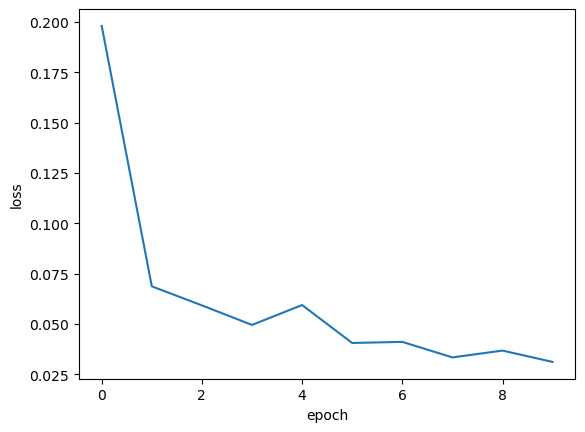

In [23]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

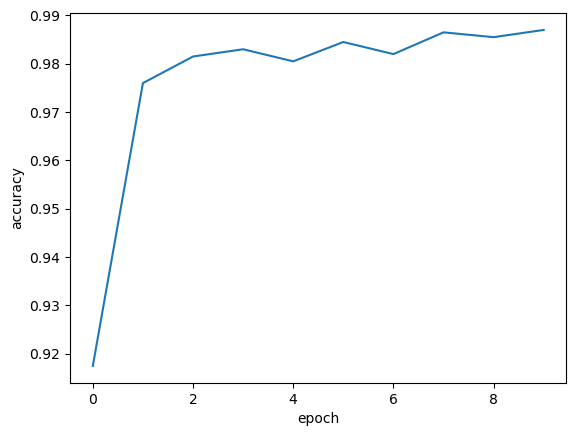

In [24]:
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

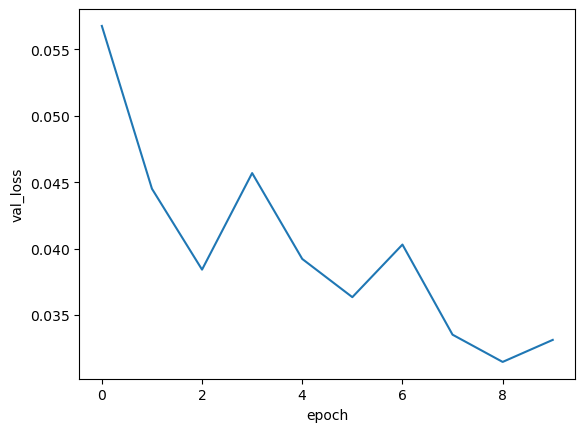

In [25]:
plt.plot(history.history['val_loss'])
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.show()

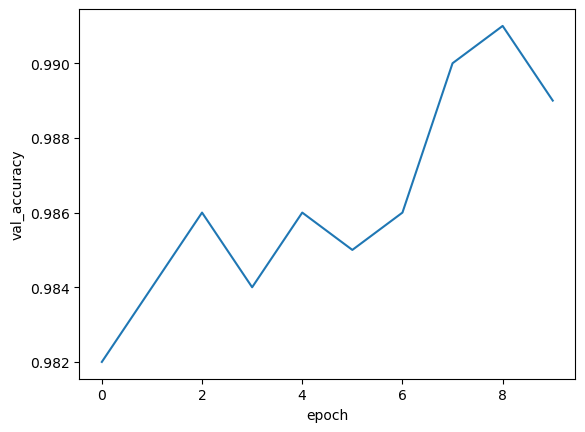

In [26]:
plt.plot(history.history['val_accuracy'])
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.show()

In [27]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    horsezebra_train, image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE,
    label_mode='int', shuffle=True, seed=SEED,
)
val_set = tf.keras.preprocessing.image_dataset_from_directory(
    horsezebra_val, image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE,
    label_mode='int', shuffle=False,
)
class_names = train_set.class_names

Found 2401 files belonging to 2 classes.
Found 260 files belonging to 2 classes.


In [28]:
base_ctor, preprocess = VGG16, vgg16_pp
inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = AUG_LAYER(inputs)
x = layers.Lambda(preprocess, name="preprocess")(x) # need preprocessing because the model was trained on preprocessed imagenet instead of raw pixels
base = base_ctor(include_top=False, weights="imagenet", input_tensor=x)
base.trainable = False
x = layers.GlobalAveragePooling2D()(base.output)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"vgg16")

In [29]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [30]:
history = model.fit(train_set, epochs=EPOCHS, validation_data=val_set)

Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.8309 - loss: 0.7098 - val_accuracy: 0.9731 - val_loss: 0.1956
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.9359 - loss: 0.2093 - val_accuracy: 0.9769 - val_loss: 0.1583
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.9529 - loss: 0.1516 - val_accuracy: 0.9769 - val_loss: 0.1395
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.9654 - loss: 0.1271 - val_accuracy: 0.9808 - val_loss: 0.1279
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.9642 - loss: 0.1000 - val_accuracy: 0.9846 - val_loss: 0.1368
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.9663 - loss: 0.0984 - val_accuracy: 0.9846 - val_loss: 0.1157
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.9725 - loss: 0.0866 - val_accuracy: 0.9846 - val_loss: 0.1204
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.9725 - loss: 0.0861 - val_accuracy: 0.9846 - v

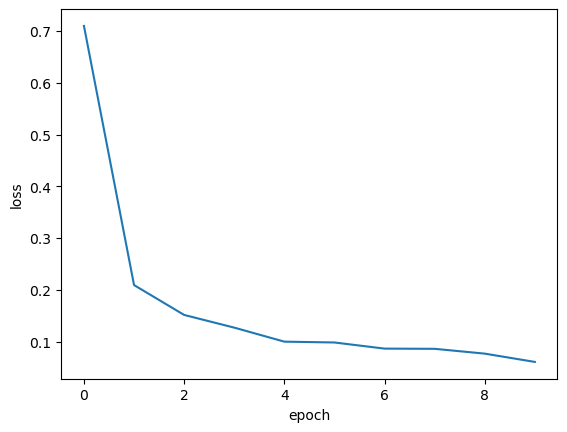

In [31]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

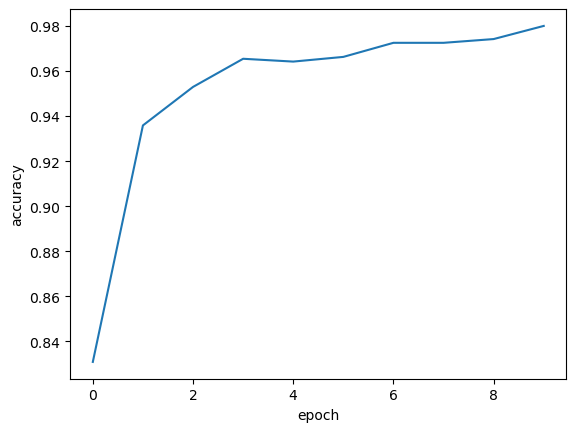

In [32]:
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

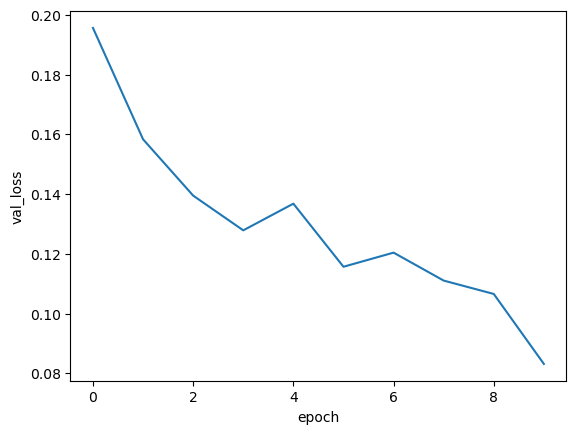

In [33]:
plt.plot(history.history['val_loss'])
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.show()

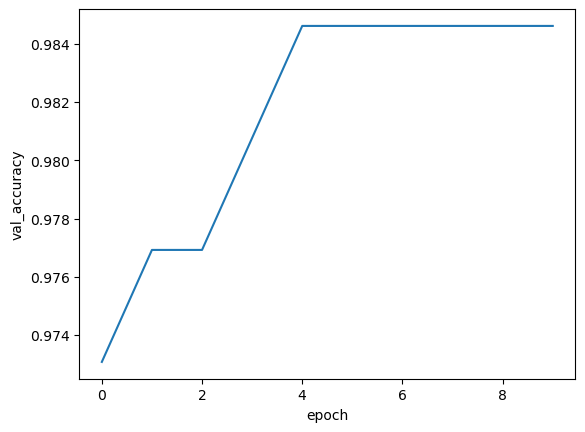

In [34]:
plt.plot(history.history['val_accuracy'])
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.show()

In [35]:
base_ctor, preprocess = InceptionV3, incv3_pp # googlenet is renamed to inception in keras
inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = AUG_LAYER(inputs)
x = layers.Lambda(preprocess, name="preprocess")(x)
base = base_ctor(include_top=False, weights="imagenet", input_tensor=x)
base.trainable = False
x = layers.GlobalAveragePooling2D()(base.output)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"vgg16")

In [36]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [37]:
history = model.fit(train_set, epochs=EPOCHS, validation_data=val_set)

Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 44s 537ms/step - accuracy: 0.9450 - loss: 0.1409 - val_accuracy: 0.9808 - val_loss: 0.0488
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 41s 539ms/step - accuracy: 0.9817 - loss: 0.0531 - val_accuracy: 0.9808 - val_loss: 0.0436
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 41s 539ms/step - accuracy: 0.9846 - loss: 0.0452 - val_accuracy: 0.9846 - val_loss: 0.0412
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 39s 518ms/step - accuracy: 0.9813 - loss: 0.0520 - val_accuracy: 0.9885 - val_loss: 0.0418
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 39s 518ms/step - accuracy: 0.9875 - loss: 0.0387 - val_accuracy: 0.9885 - val_loss: 0.0425
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 40s 527ms/step - accuracy: 0.9867 - loss: 0.0338 - val_accuracy: 0.9923 - val_loss: 0.0366
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 40s 530ms/step - accuracy: 0.9854 - loss: 0.0376 - val_accuracy: 0.9923 - val_loss: 0.0351
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 42s 549ms/step - accuracy: 0.9871 - loss: 0.0299 - val_accu

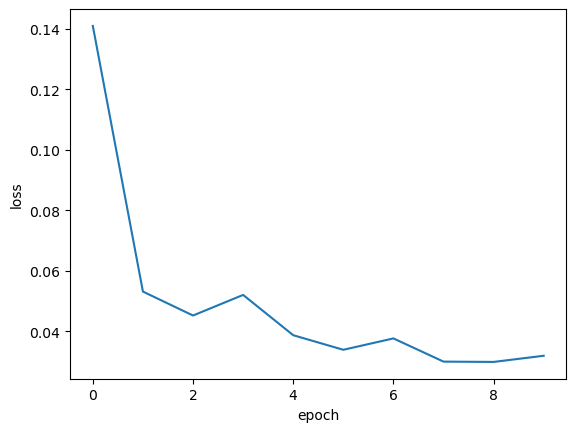

In [38]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

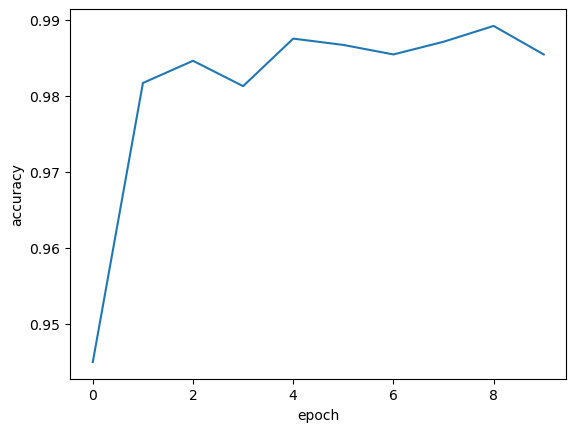

In [39]:
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

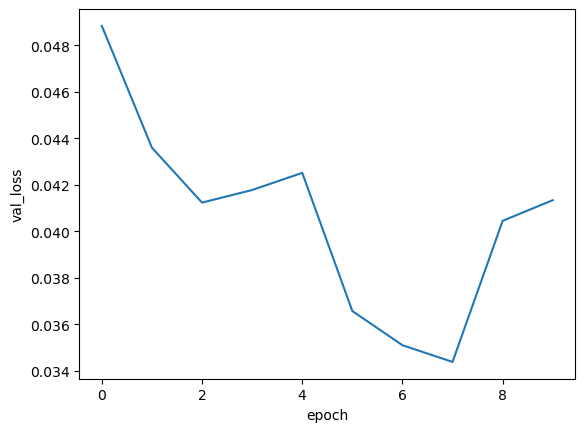

In [40]:
plt.plot(history.history['val_loss'])
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.show()

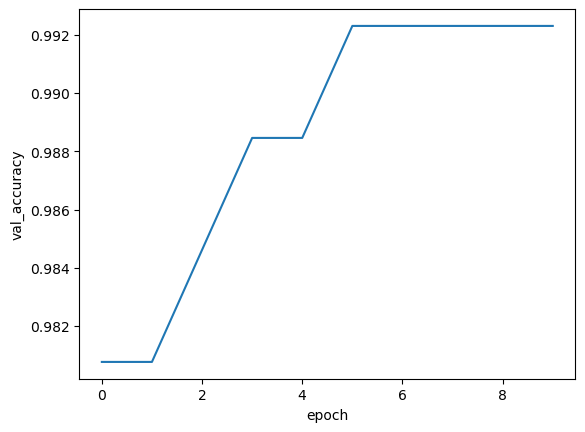

In [41]:
plt.plot(history.history['val_accuracy'])
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.show()

In [42]:
base_ctor, preprocess = ResNet50, resnet50_pp
inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = AUG_LAYER(inputs)
x = layers.Lambda(preprocess, name="preprocess")(x)
base = base_ctor(include_top=False, weights="imagenet", input_tensor=x)
base.trainable = False
x = layers.GlobalAveragePooling2D()(base.output)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"vgg16")

In [43]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [44]:
history = model.fit(train_set, epochs=EPOCHS, validation_data=val_set)

Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9467 - loss: 0.1367 - val_accuracy: 0.9885 - val_loss: 0.0294
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9808 - loss: 0.0554 - val_accuracy: 0.9923 - val_loss: 0.0246
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9858 - loss: 0.0359 - val_accuracy: 0.9885 - val_loss: 0.0244
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9875 - loss: 0.0365 - val_accuracy: 0.9923 - val_loss: 0.0260
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9908 - loss: 0.0251 - val_accuracy: 0.9923 - val_loss: 0.0288
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9896 - loss: 0.0255 - val_accuracy: 0.9923 - val_loss: 0.0296
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9925 - loss: 0.0233 - val_accuracy: 0.9885 - val_loss: 0.0378
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9913 - loss: 0.0195 - val_accuracy: 0.9885 - val_loss:

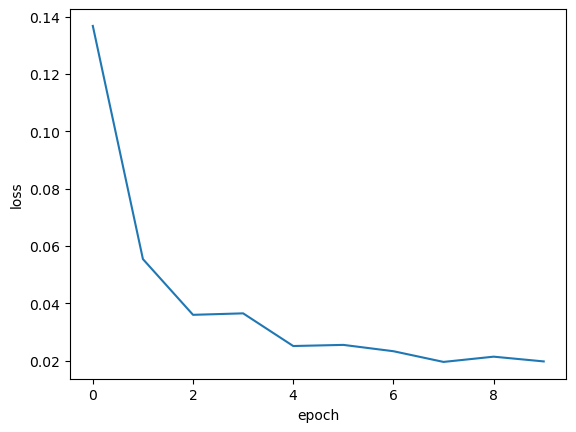

In [45]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

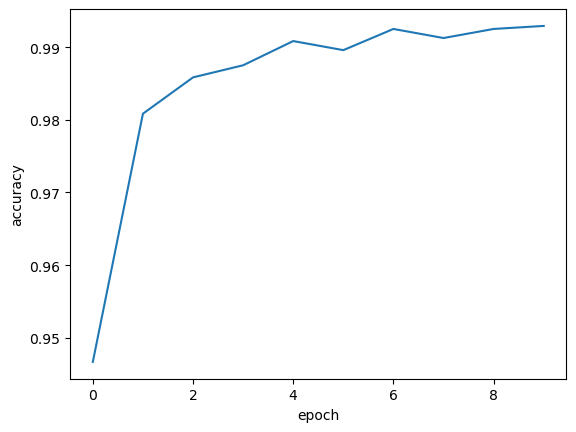

In [46]:
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

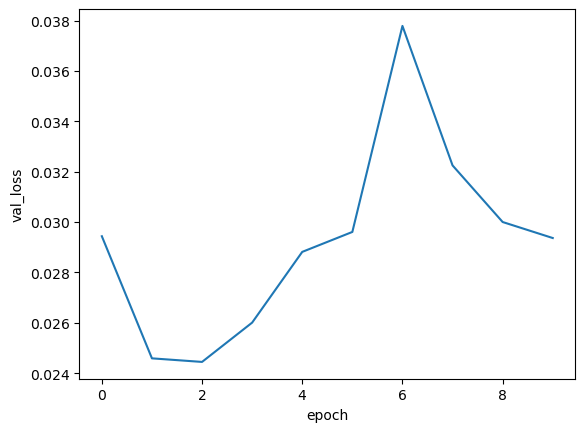

In [47]:
plt.plot(history.history['val_loss'])
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.show()

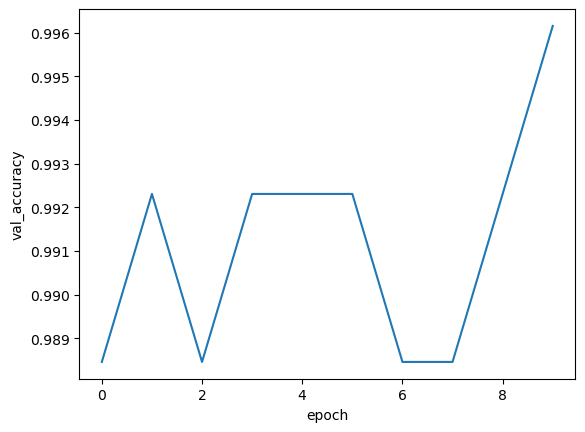

In [48]:
plt.plot(history.history['val_accuracy'])
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.show()

In [49]:
base_ctor, preprocess = EfficientNetB0, effb0_pp
inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = AUG_LAYER(inputs)
x = layers.Lambda(preprocess, name="preprocess")(x)
base = base_ctor(include_top=False, weights=None, input_tensor=x) #efficientnet not working with imagenet weights
base.trainable = False
x = layers.GlobalAveragePooling2D()(base.output)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"efficientnetb0")

In [50]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [51]:
history = model.fit(train_set, epochs=EPOCHS, validation_data=val_set)

Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 48s 571ms/step - accuracy: 0.5544 - loss: 0.6911 - val_accuracy: 0.5385 - val_loss: 0.6908
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 42s 554ms/step - accuracy: 0.5556 - loss: 0.6885 - val_accuracy: 0.5385 - val_loss: 0.6902
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 42s 555ms/step - accuracy: 0.5556 - loss: 0.6875 - val_accuracy: 0.5385 - val_loss: 0.6902
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 42s 555ms/step - accuracy: 0.5556 - loss: 0.6872 - val_accuracy: 0.5385 - val_loss: 0.6904
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 42s 554ms/step - accuracy: 0.5556 - loss: 0.6871 - val_accuracy: 0.5385 - val_loss: 0.6904
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 43s 563ms/step - accuracy: 0.5556 - loss: 0.6870 - val_accuracy: 0.5385 - val_loss: 0.6906
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 42s 555ms/step - accuracy: 0.5556 - loss: 0.6870 - val_accuracy: 0.5385 - val_loss: 0.6907
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 42s 555ms/step - accuracy: 0.5556 - loss: 0.6870 - val_accu

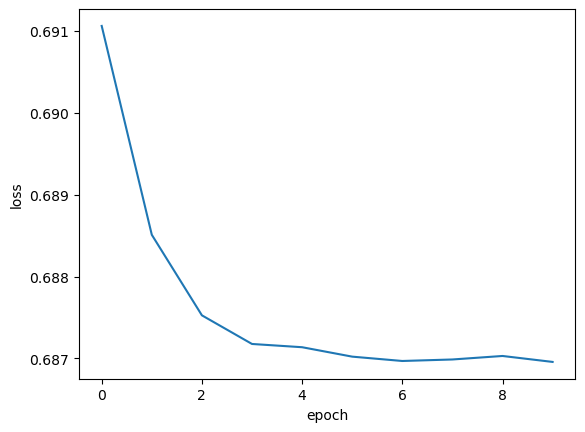

In [52]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

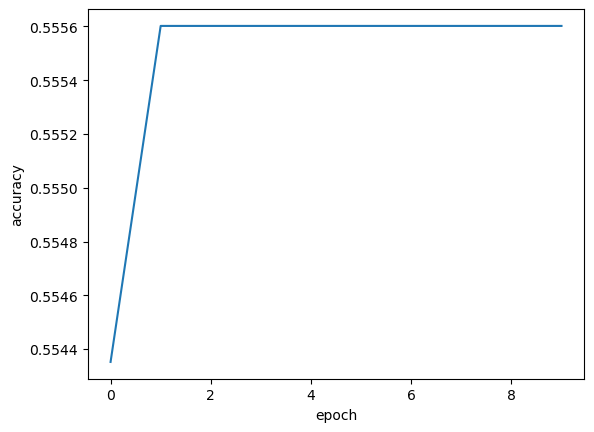

In [53]:
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

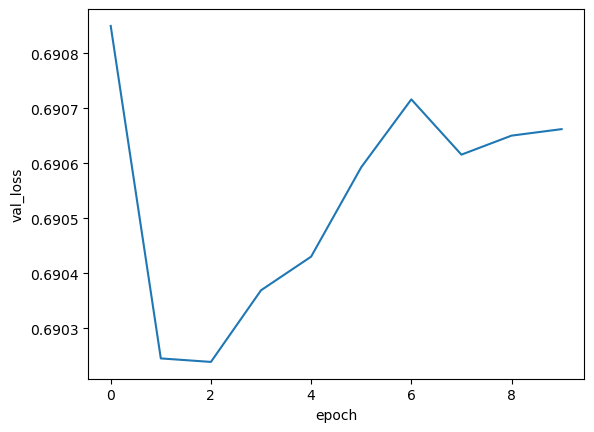

In [54]:
plt.plot(history.history['val_loss'])
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.show()

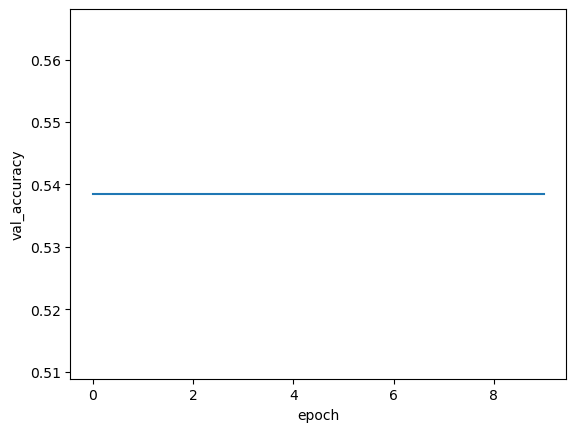

In [55]:
plt.plot(history.history['val_accuracy'])
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.show()

In [56]:
base_ctor, preprocess = MobileNetV2, mobilenetv2_pp
inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = AUG_LAYER(inputs)
x = layers.Lambda(preprocess, name="preprocess")(x)
base = base_ctor(include_top=False, weights="imagenet", input_tensor=x)
base.trainable = False
x = layers.GlobalAveragePooling2D()(base.output)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"vgg16")

/tmp/ipykernel_258195/2217773973.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base = base_ctor(include_top=False, weights="imagenet", input_tensor=x)


In [57]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [58]:
history = model.fit(train_set, epochs=EPOCHS, validation_data=val_set)

Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 36s 440ms/step - accuracy: 0.9159 - loss: 0.1932 - val_accuracy: 0.9769 - val_loss: 0.0621
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 33s 435ms/step - accuracy: 0.9808 - loss: 0.0603 - val_accuracy: 0.9808 - val_loss: 0.0469
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 33s 438ms/step - accuracy: 0.9850 - loss: 0.0442 - val_accuracy: 0.9808 - val_loss: 0.0439
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 33s 437ms/step - accuracy: 0.9829 - loss: 0.0419 - val_accuracy: 0.9846 - val_loss: 0.0416
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 33s 437ms/step - accuracy: 0.9871 - loss: 0.0319 - val_accuracy: 0.9808 - val_loss: 0.0437
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 33s 437ms/step - accuracy: 0.9858 - loss: 0.0334 - val_accuracy: 0.9846 - val_loss: 0.0386
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 33s 437ms/step - accuracy: 0.9904 - loss: 0.0273 - val_accuracy: 0.9808 - val_loss: 0.0399
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 33s 438ms/step - accuracy: 0.9879 - loss: 0.0314 - val_accu

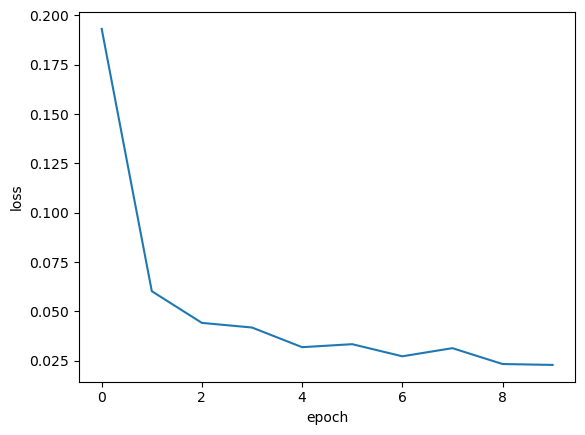

In [59]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

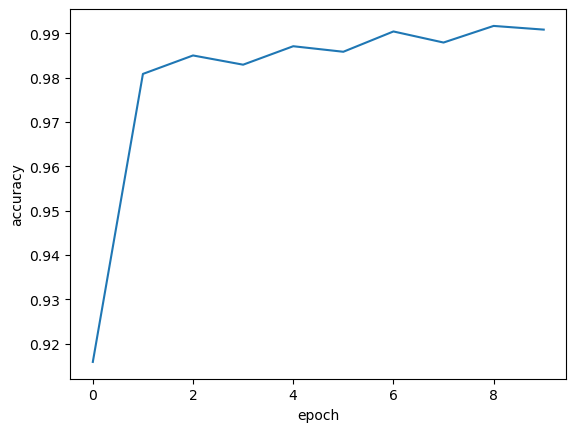

In [60]:
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

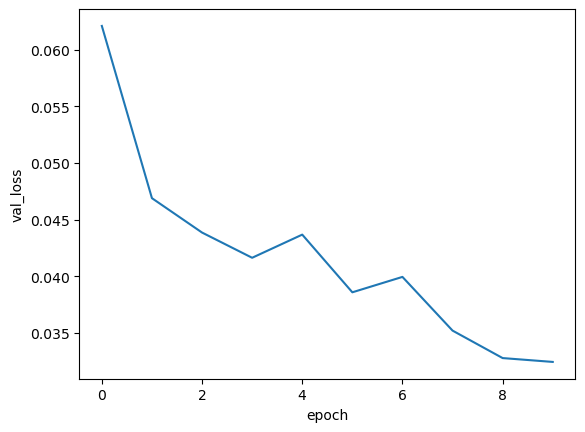

In [61]:
plt.plot(history.history['val_loss'])
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.show()

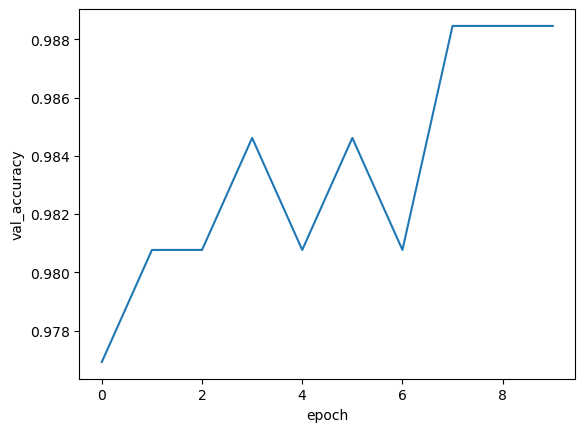

In [62]:
plt.plot(history.history['val_accuracy'])
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.show()

# Model Performance Comparison

## Summary of Transfer Learning Results

This notebook evaluated multiple pre-trained CNN architectures on two different datasets using transfer learning. Below is a comprehensive comparison of their performance:

### Datasets:
1. **Cats & Dogs Classification** - Binary classification task (2000 training samples, 1000 validation samples)
2. **Horse & Zebra Classification** - Binary classification task (2401 training samples, 260 validation samples)

---

## Performance Comparison Table

| Model | Dataset | Final Train Accuracy | Final Val Accuracy | Final Train Loss | Final Val Loss | Avg Time/Epoch | Total Training Time |
|-------|---------|---------------------|-------------------|------------------|----------------|----------------|-------------------|
| **VGG16** | Cats & Dogs | 97.80% | 98.30% | 0.0804 | 0.0576 | ~10s | ~100s |
| **InceptionV3** | Cats & Dogs | 99.20% | 98.90% | 0.0276 | 0.0306 | ~6s | ~60s |
| **ResNet50** | Cats & Dogs | 99.25% | 99.10% | 0.0204 | 0.0257 | ~9s | ~90s |
| **EfficientNetB0*** | Cats & Dogs | 48.80% | 50.00% | 0.6932 | 0.6931 | ~46s | ~460s |
| **MobileNetV2** | Cats & Dogs | 98.70% | 98.90% | 0.0312 | 0.0331 | ~36s | ~360s |
| **VGG16** | Horse & Zebra | 98.00% | 98.46% | 0.0608 | 0.0831 | ~133s | ~1330s |
| **InceptionV3** | Horse & Zebra | 98.54% | 99.23% | 0.0319 | 0.0413 | ~41s | ~410s |
| **ResNet50** | Horse & Zebra | 99.29% | 99.62% | 0.0197 | 0.0294 | ~81s | ~810s |
| **EfficientNetB0*** | Horse & Zebra | 55.56% | 53.85% | 0.6870 | 0.6907 | ~42s | ~420s |
| **MobileNetV2** | Horse & Zebra | 99.08% | 98.85% | 0.0229 | 0.0324 | ~33s | ~330s |

*\*EfficientNetB0 failed with pretrained ImageNet weights due to Keras 3.x compatibility issues, so results shown are without pretrained weights (weights=None)*

---

## Key Observations:

### **Best Performing Models:**
1. **ResNet50** - Consistently achieved highest validation accuracy on both datasets
2. **InceptionV3** - Excellent performance with faster training times
3. **MobileNetV2** - Good balance of accuracy and efficiency

### **Speed Analysis:**
1. **Fastest**: InceptionV3 (~6s/epoch on Cats & Dogs)
2. **Most Efficient**: MobileNetV2 (good accuracy with reasonable speed)
3. **Slowest**: VGG16 on Horse & Zebra dataset (~133s/epoch)
